In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas, NumPy, visulaisation libraries, sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Importing the Dataframe

In [2]:
# Importing all datasets
ls = pd.read_csv(r"C:\Users\sesa505163\Desktop\New folder (2)\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
ls.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

# Inspecting the Dataframe

In [3]:
# Let's check the dimensions of the dataframe
ls.shape

(9240, 37)

In [4]:
# Let's see the type of each column
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# let's look at the statistical aspects of the dataframe
ls.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
#Relacing select with np.nan
ls = ls.replace('Select', np.nan)

In [7]:
#Verifying for duplicates
sum(ls.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
# Adding up the missing values (column-wise)
ls.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# Data Preparation

In [10]:
# Lets drop the columns having more than 70% NA values.
ls = ls.drop(ls.loc[:,list(round(100*(ls.isnull().sum()/len(ls.index)), 2)>70)].columns, 1)

In [11]:
ls['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

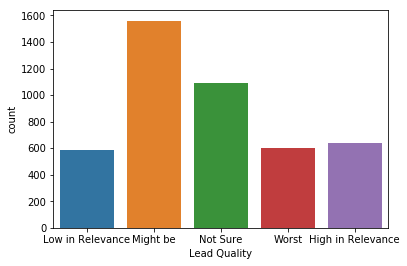

In [12]:
# Plotting the data with the given data
sns.countplot(ls['Lead Quality'])

In [13]:
# Verifying the total Null values
ls['Lead Quality'].isnull().sum()

4767

In [14]:
# Handling the NaN
ls['Lead Quality'] = ls['Lead Quality'].replace(np.nan, 'Not Sure')

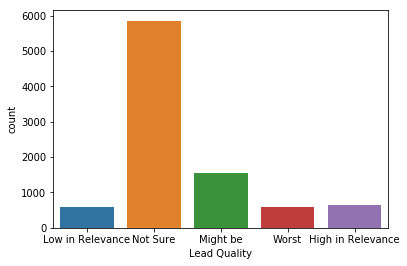

In [15]:
# Plotting the graph after replacing
sns.countplot(ls['Lead Quality'])

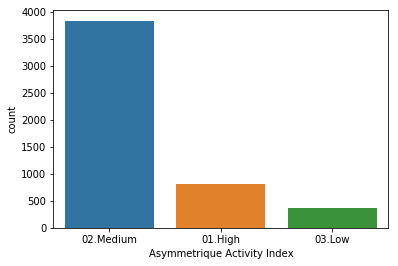

In [16]:
# Plotting the data with the given data
plt1 = sns.countplot(ls['Asymmetrique Activity Index'])

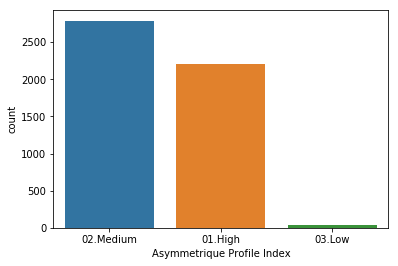

In [17]:
# Plotting the data with the given data
plt2 = sns.countplot(ls['Asymmetrique Profile Index'])

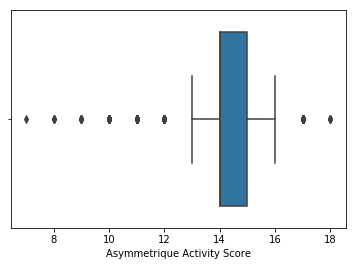

In [18]:
# Plotting the data with the given data
plt3 = sns.boxplot(ls['Asymmetrique Activity Score'])

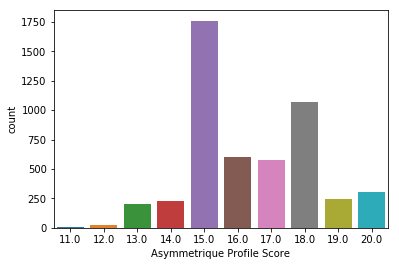

In [19]:
# Plotting the data with the given data
plt4 = sns.countplot(ls['Asymmetrique Profile Score'])

As per the above graphs, we can observe that there is so much variation in the data. So dropping the above variables

In [20]:
ls = ls.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [21]:
# Verifying the percentage of missing values after dropping the variables
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [22]:
# Considering the next highest missing values variable
ls['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

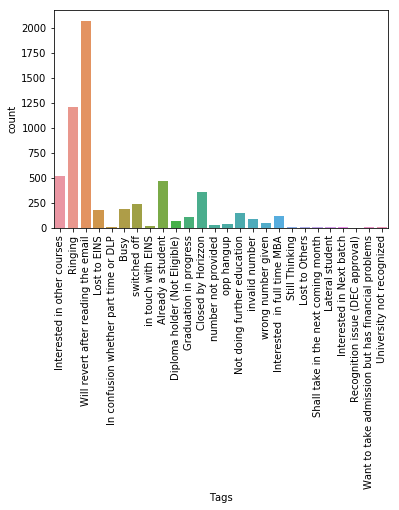

In [23]:
plt5 = sns.countplot(ls['Tags'])
plt5 = xticks(rotation = 90)

In [24]:
# Handling the NaN
ls['Tags'] = ls['Tags'].replace(np.nan, 'Will revert after reading the email')

In [25]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
# Considering the next highest missing values variable
ls['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

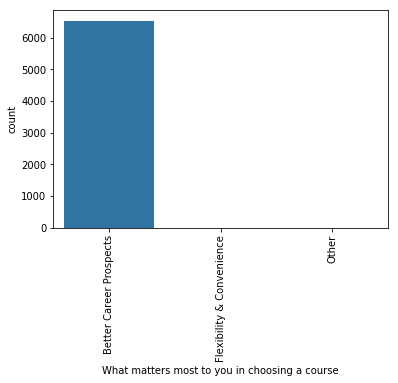

In [27]:
plt7 = sns.countplot(ls['What matters most to you in choosing a course'])
plt7 = xticks(rotation = 90)

In [28]:
# Handling the NaN
ls['What matters most to you in choosing a course'] = ls['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [29]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [30]:
# Considering the next highest missing values variable
ls['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

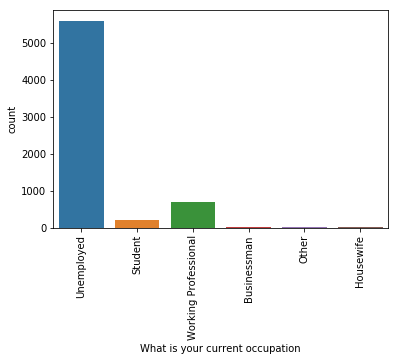

In [31]:
plt8 = sns.countplot(ls['What is your current occupation'])
plt8 = xticks(rotation = 90)

In [32]:
# Handling the NaN
ls['What is your current occupation'] = ls['What is your current occupation'].replace(np.nan, 'Unemployed')

In [33]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [34]:
# Considering the next highest missing values variable
ls['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

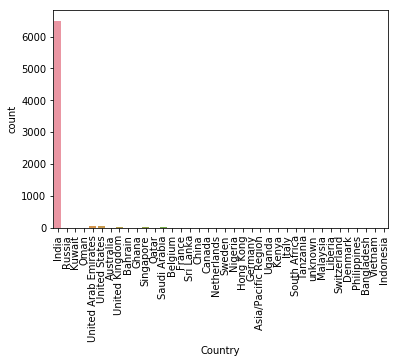

In [35]:
plt10 = sns.countplot(ls['Country'])
plt10 = xticks(rotation = 90)

In [36]:
# Handling the NaN
ls['Country'] = ls['Country'].replace(np.nan, 'India')

In [37]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [38]:
# Considering the next highest missing values variable
ls['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

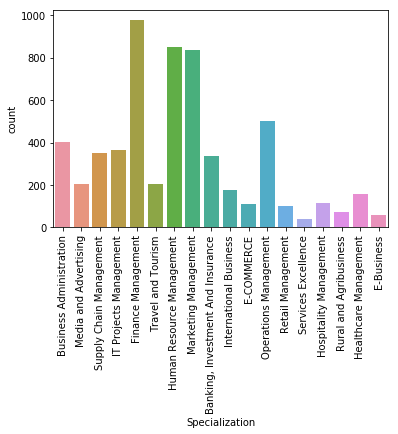

In [39]:
plt11 = sns.countplot(ls['Specialization'])
plt11 = xticks(rotation = 90)

In [40]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [41]:
# Considering the next highest missing values variable
ls['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

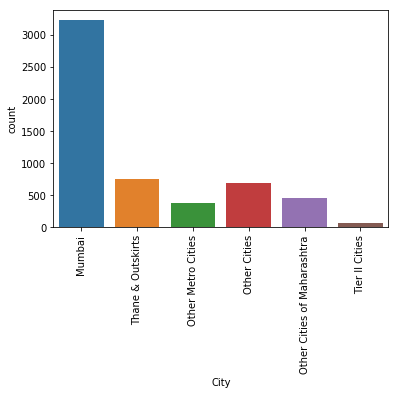

In [42]:
plt12 = sns.countplot(ls['City'])
plt12 = xticks(rotation = 90)

In [43]:
# Handling the NaN
ls['City'] = ls['City'].replace(np.nan, 'Mumbai')

In [44]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [45]:
# Handling the NaN
ls['Page Views Per Visit'] = ls['Page Views Per Visit'].fillna((ls['Page Views Per Visit'].mean()))

In [46]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [47]:
# Handling the NaN
ls['TotalVisits'] = ls['TotalVisits'].fillna((ls['TotalVisits'].mean()))

In [48]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [49]:
# Considering the next highest missing values variable
ls['TotalVisits'].describe()

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [50]:
# Handling the NaN
ls['TotalVisits'] = ls['TotalVisits'].fillna((ls['TotalVisits'].mean()))

In [51]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [52]:
# Considering the next highest missing values variable
ls['Last Activity'].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

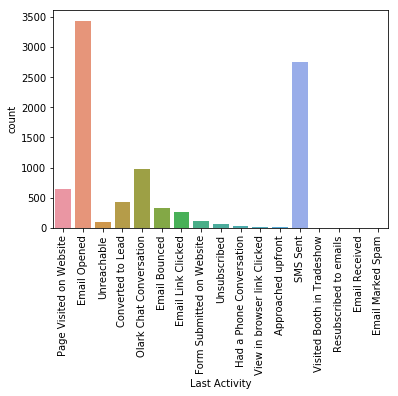

In [53]:
plt12 = sns.countplot(ls['Last Activity'])
plt12 = xticks(rotation = 90)

In [54]:
# Handling the NaN
ls['Last Activity'] = ls['Last Activity'].replace(np.nan, 'Email Opened')

In [55]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [56]:
# Considering the next highest missing values variable
ls['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

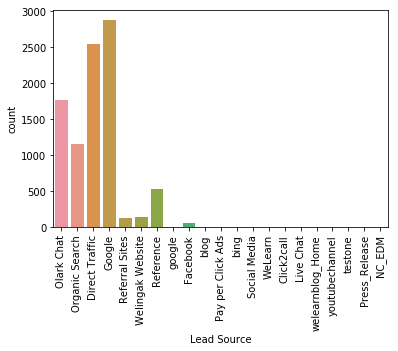

In [57]:
plt13 = sns.countplot(ls['Lead Source'])
plt13 = xticks(rotation = 90)

In [58]:
# Handling the NaN
ls['Lead Source'] = ls['Lead Source'].replace(np.nan, 'Google')

In [59]:
# Verifying the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

# Exploratory Data Analysis

 Performing Univariate Analysis

In [60]:
# For Converter
Converted = (sum(ls['Converted'])/len(ls['Converted'].index))*100
Converted

38.53896103896104

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

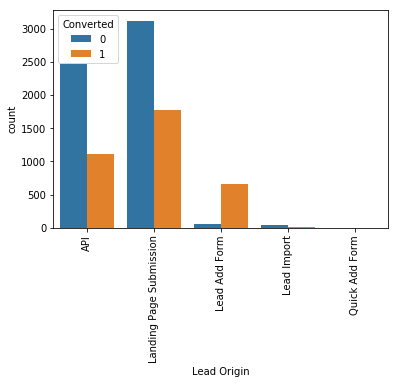

In [61]:
# For Lead Origin
sns.countplot(x = "Lead Origin", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- The "API" and "Landing Page Submission" have around 35% of conversion rate
- "Lead Add Form" is having more than 90% conversion rate but count of lead are not very high.
- "Lead Import" and "Quick Add Form" are very less in count.

Suggestion:-

- To improve the lead conversion rate, we need to focus much on "API" and "Landing Page Submission" origin 
- Generate more leads from Lead Add Form.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

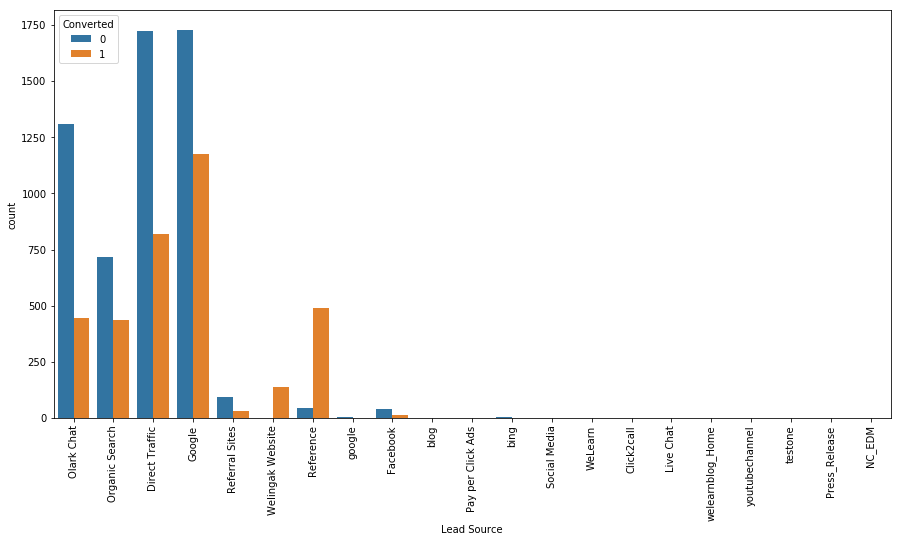

In [62]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = ls)
xticks(rotation = 90)

In [63]:
# Grouping the variables which has a very less value or which has no values in the a single group as "Misc"
ls['Lead Source'] = ls['Lead Source'].replace(['blog','Pay per Click Ads','bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Misc')

In [64]:
# Since we have two variables with same name
ls['Lead Source'] = ls['Lead Source'].replace(['google'], 'Google')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

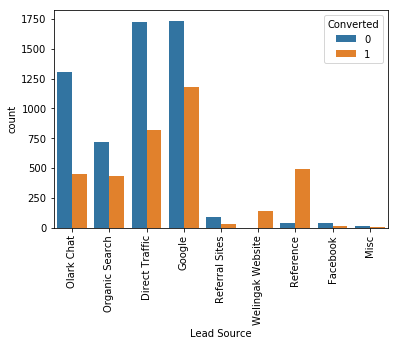

In [65]:
sns.countplot(x = "Lead Source", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- "Direct traffic" and "Google" has maximum number of leads.
-  "Conversion Rate of reference leads and leads through welingak website is high.

Suggestion:- 

- To improve overall lead conversion rate,we need to focus on improving lead converion for Olark chat, Organic Search, Direct Traffic and Google leads 
- Generate more leads from Reference and Welingak Website.

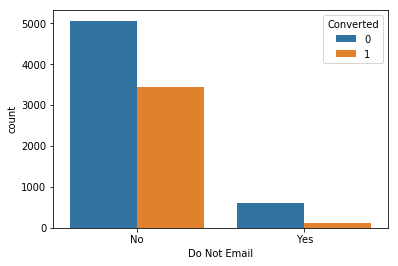

In [66]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = ls)

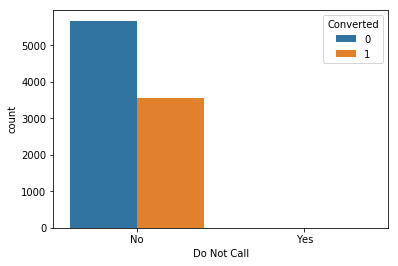

In [67]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = ls)

In [68]:
ls['TotalVisits'].describe(percentiles=[0.05,0.25,0.5,.60,0.70,.75,0.80, 0.85, 0.90, 0.95, 0.99])

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
60%         3.000000
70%         4.000000
75%         5.000000
80%         5.000000
85%         6.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

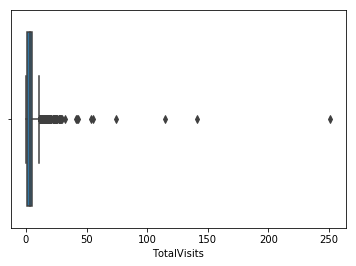

In [69]:
sns.boxplot(ls['TotalVisits'])

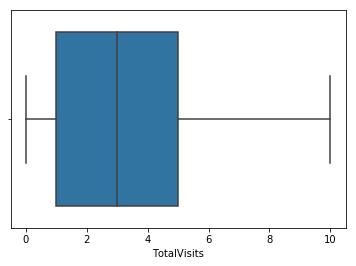

In [70]:
# As per the above graph its observed that there are many outliers. So we will quantile the values to 95%
percentiles = ls['TotalVisits'].quantile([0.05,0.95]).values
ls['TotalVisits'][ls['TotalVisits'] <= percentiles[0]] = percentiles[0]
ls['TotalVisits'][ls['TotalVisits'] >= percentiles[1]] = percentiles[1]
sns.boxplot(ls['TotalVisits'])

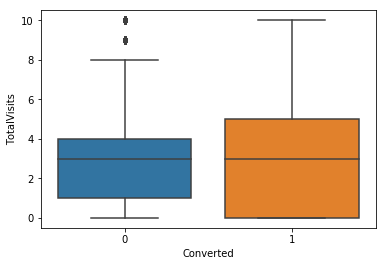

In [71]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = ls)

Observations:- 
- Both the values seems to be similar.

Suggestion:- 
- We cannot recommend any suggestions

In [72]:
ls['Total Time Spent on Website'].describe(percentiles=[0.05,0.25,0.5,.60,0.70,.75,0.80, 0.85, 0.90, 0.95, 0.99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
60%       372.000000
70%       715.000000
75%       936.000000
80%      1087.200000
85%      1233.150000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

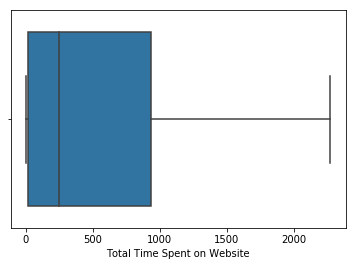

In [73]:
sns.boxplot(ls['Total Time Spent on Website'])

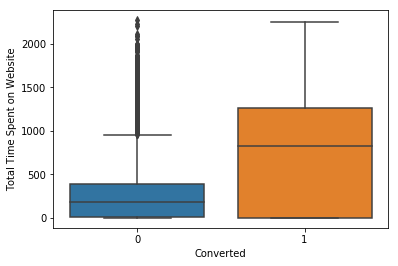

In [74]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = ls)

Observation:- 
- Who spend more time in browsing can be converted more likely

Suggestion:-
- We should make sure the leads spend more time in browsing

In [75]:
ls['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.5,.60,0.70,.75,0.80, 0.85, 0.90, 0.95, 0.99])

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
60%         2.500000
70%         3.000000
75%         3.000000
80%         4.000000
85%         4.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

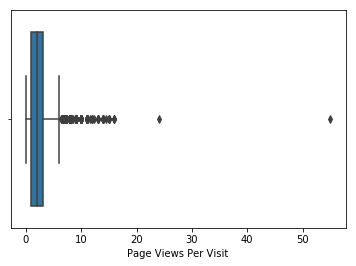

In [76]:
sns.boxplot(ls['Page Views Per Visit'])

In [77]:
# As per the above graph its observed that there are many outliers. So we will quantile the values to 95%

percentiles = ls['Page Views Per Visit'].quantile([0.05,0.95]).values
ls['Page Views Per Visit'][ls['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
ls['Page Views Per Visit'][ls['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

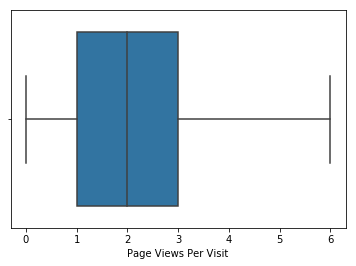

In [78]:
sns.boxplot(ls['Page Views Per Visit'])

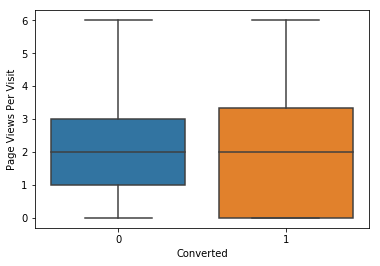

In [79]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = ls)

Observations:- 
- Both the values seems to be similar.

Suggestion:- 
- We cannot recommend any suggestions

In [80]:
ls['Last Activity'].describe()

count             9240
unique              17
top       Email Opened
freq              3540
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

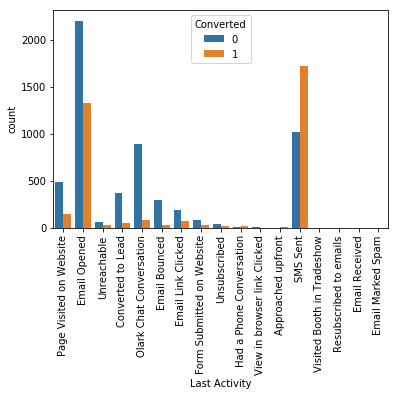

In [81]:
sns.countplot(x = "Last Activity", hue = "Converted", data = ls)
xticks(rotation = 90)

In [82]:
# Grouping the variables which has a very less value or which has no values in the a single group as "Misc"
ls['Last Activity'] = ls['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Misc')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

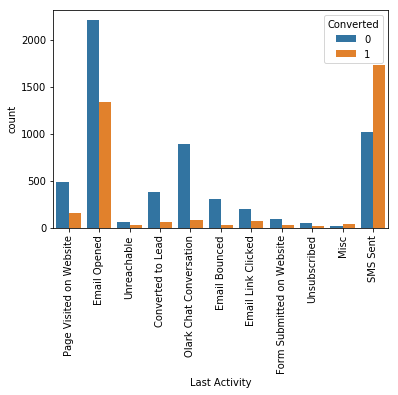

In [83]:
sns.countplot(x = "Last Activity", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- Email Open is the last activity.

Suggestion:- 
- SMS Sent has the most convertion rate

In [84]:
ls['Country'].describe()

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

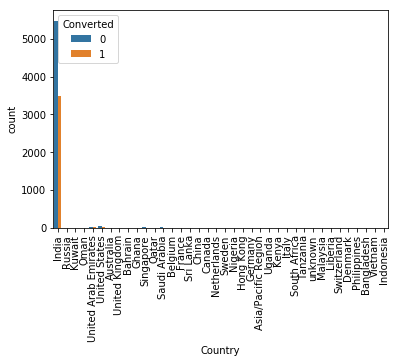

In [85]:
sns.countplot(x = "Country", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- As per the above graph, apart India there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [86]:
ls['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

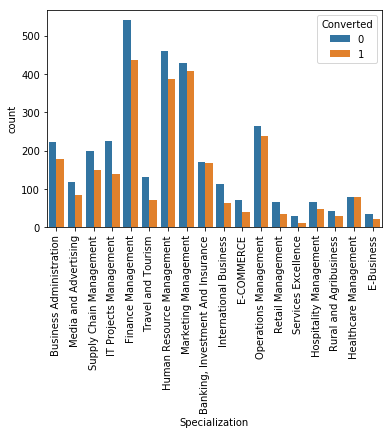

In [87]:
sns.countplot(x = "Specialization", hue = "Converted", data = ls)
xticks(rotation = 90)

In [88]:
ls['What is your current occupation'].describe()

count           9240
unique             6
top       Unemployed
freq            8290
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

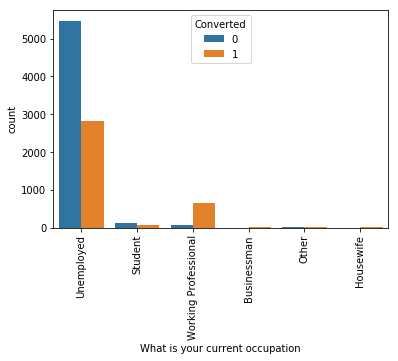

In [89]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- As per the above graph, working professional are opting for the courses which are in high demand.
- Unemployed are more in number of conversion ration

In [90]:
ls['What matters most to you in choosing a course'].describe()

count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

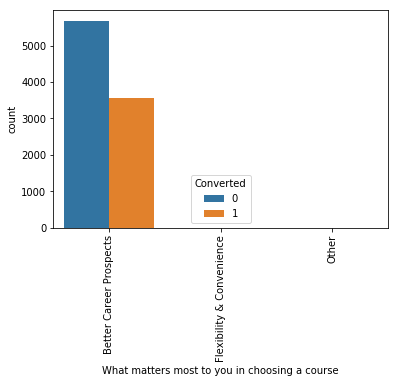

In [91]:
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- As per the above graph, apart Better Career Prospects there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [92]:
ls['Search'].describe()

count     9240
unique       2
top         No
freq      9226
Name: Search, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

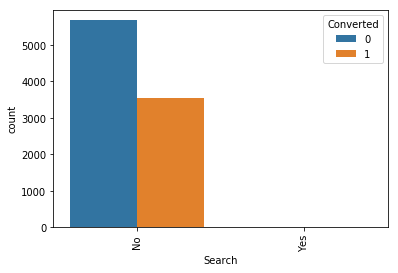

In [93]:
sns.countplot(x = "Search", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [94]:
ls['Magazine'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Magazine, dtype: object

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [95]:
ls['Newspaper Article'].describe()

count     9240
unique       2
top         No
freq      9238
Name: Newspaper Article, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

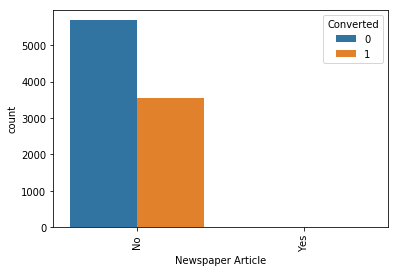

In [96]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [97]:
ls['X Education Forums'].describe()

count     9240
unique       2
top         No
freq      9239
Name: X Education Forums, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

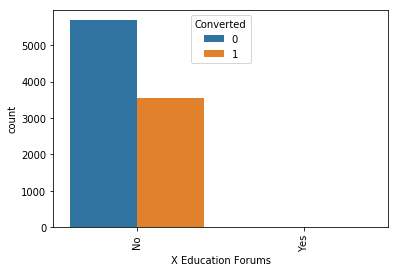

In [98]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [99]:
ls['Newspaper'].describe()

count     9240
unique       2
top         No
freq      9239
Name: Newspaper, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

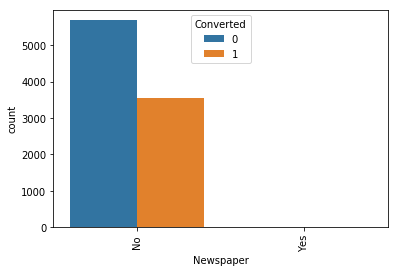

In [100]:
sns.countplot(x = "Newspaper", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [101]:
ls['Digital Advertisement'].describe()

count     9240
unique       2
top         No
freq      9236
Name: Digital Advertisement, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

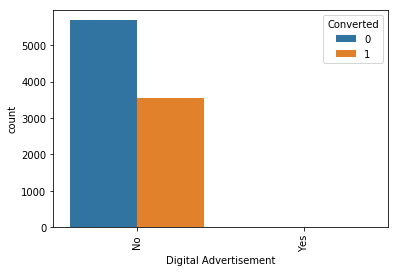

In [102]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [103]:
ls['Through Recommendations'].describe()

count     9240
unique       2
top         No
freq      9233
Name: Through Recommendations, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

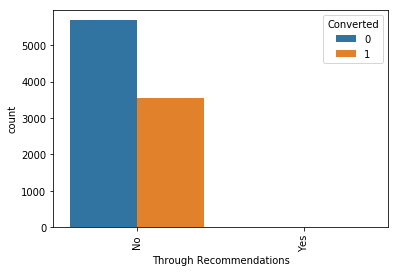

In [104]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = ls)
xticks(rotation = 90)

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [105]:
ls['Receive More Updates About Our Courses'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Receive More Updates About Our Courses, dtype: object

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [106]:
ls['Tags'].describe()

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

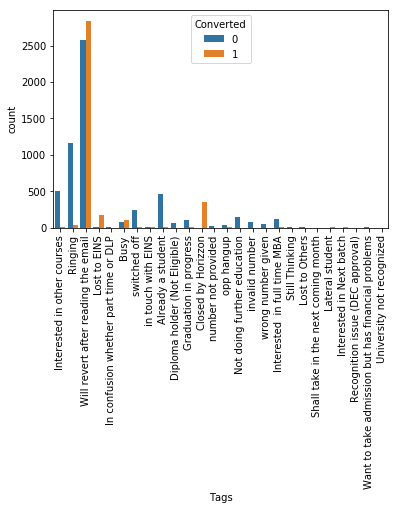

In [107]:
sns.countplot(x = "Tags", hue = "Converted", data = ls)
xticks(rotation = 90)

In [108]:
# Grouping the variables which has a very less value or which has no values in the a single group as "Misc"
ls['Tags'] = ls['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)', 'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking', 'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch', 'Recognition issue (DEC approval)','Want to take admission but has financial problems', 'University not recognized'], 'Misc')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

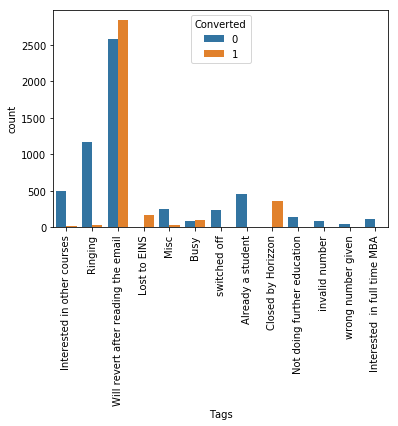

In [109]:
sns.countplot(x = "Tags", hue = "Converted", data = ls)
xticks(rotation = 90)

In [110]:
ls['Lead Quality'].describe()

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

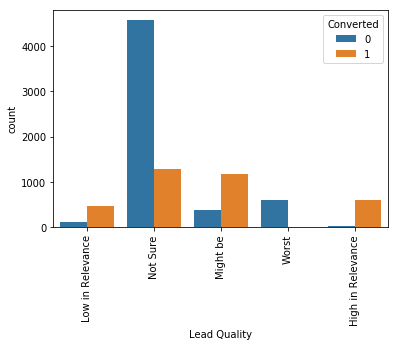

In [111]:
sns.countplot(x = "Lead Quality", hue = "Converted", data = ls)
xticks(rotation = 90)

In [112]:
ls['Update me on Supply Chain Content'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Update me on Supply Chain Content, dtype: object

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [113]:
ls['Get updates on DM Content'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Get updates on DM Content, dtype: object

Observations:- 
- As per the above graph, apart "No" there are no much observations can be drawn.

Suggestion:- 
- We cannot recommend any suggestions

In [114]:
ls['City'].describe()

count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

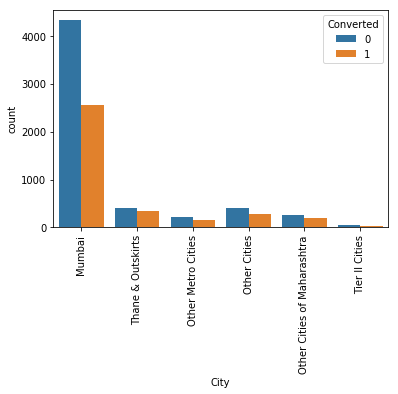

In [115]:
sns.countplot(x = "City", hue = "Converted", data = ls)
xticks(rotation = 90)

In [116]:
ls['I agree to pay the amount through cheque'].describe()

count     9240
unique       1
top         No
freq      9240
Name: I agree to pay the amount through cheque, dtype: object

In [117]:
ls['A free copy of Mastering The Interview'].describe()

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

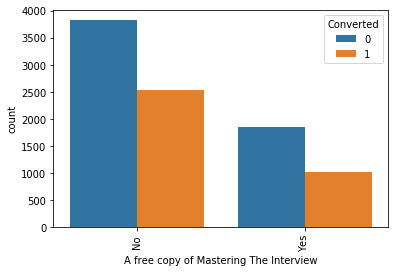

In [118]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = ls)
xticks(rotation = 90)

In [119]:
ls['Last Notable Activity'].describe()

count         9240
unique          16
top       Modified
freq          3407
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

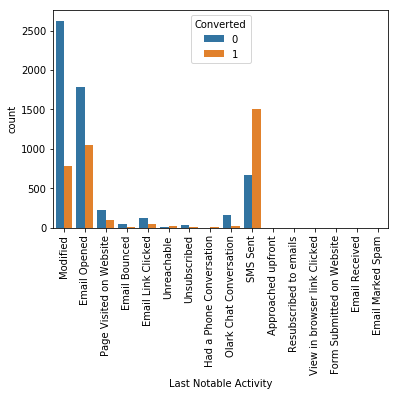

In [120]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = ls)
xticks(rotation = 90)

In [121]:
# Based on the above analysis, we can sort out that few variables are not proving any value add. So dropping the variables
ls = ls.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [122]:
ls.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                      NaN                      Unemployed   
1                      NaN                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                      NaN                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [123]:
ls.shape

(9240, 16)

# Data Preparation

In [124]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
ls[varlist] = ls[varlist].apply(binary_map)

In [125]:
ls.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                      NaN                      Unemployed   
1                      NaN                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                      NaN                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [126]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(ls[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
ls = pd.concat([ls, dummy1], axis=1)

In [127]:
ls.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... Last Notable Activity_Form Submitted on Website  \
0  ...                                               0   
1  ...                                               0   
2  ...                                               0   
3  ...                                               0   
4  ...                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Page Visited on Website  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Resubscribed to emails  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3

In [128]:
ls.to_csv('file1.csv')

In [129]:
# We have created dummies for the below variables, so we can drop them
ls = ls.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [130]:
ls.shape

(9240, 87)

In [131]:
ls.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Acti

In [132]:
# Putting feature variable to X
X = ls.drop(['Prospect ID','Converted'], axis=1)

In [133]:
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
0                           0                     0  ...   
1                           0                     0  ...   
2                           0                     0  ...   
3                           0                     0  ...   
4                           0                     0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                              

In [134]:
# Putting response variable to y
y = ls['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [135]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [136]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -1.152121                    -0.885371   
6795             0            0     0.297240                     0.005716   
3516             0            0     0.659580                    -0.691418   
8105             0            0     0.659580                     1.365219   
3934             0            0    -1.152121                    -0.885371   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
1871             -1.269958                                    0   
6795             -0.519633                                    1   
3516              0.140427                                    0   
8105              1.550812                                    1   
3934             -1.269958                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
1871                           0                     0  ...   
6795                           0                     0  ...   
3516                           0                     0  ...   
8105                           0                     0  ...   
3934                           0                     0  ...   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   

      Last Notable Activity_Unsubscribed 

In [137]:
# Checking the Churn Rate
Converted = (sum(ls['Converted'])/len(ls['Converted'].index))*100
Converted

38.53896103896104

# Looking at Correlations

In [138]:
ls.corr()

Do Not Email  Do Not Call  \
Do Not Email                                            1.000000    -0.004322   
Do Not Call                                            -0.004322     1.000000   
Converted                                              -0.135580     0.018581   
TotalVisits                                            -0.000861     0.007003   
Total Time Spent on Website                            -0.046374     0.006801   
Page Views Per Visit                                    0.019600    -0.006289   
Lead Origin_Landing Page Submission                     0.095304    -0.015587   
Lead Origin_Lead Add Form                              -0.020983     0.023210   
Lead Origin_Lead Import                                -0.017529    -0.001139   
Lead Origin_Quick Add Form                              0.035416    -0.000153   
Lead Source_Facebook                                   -0.017529    -0.001139   
Lead Source_Google                                     -0.062113     0.005866   
Lead Source_Misc                                        0.009421    -0.000735   
Lead Source_Olark Chat                                 -0.051436    -0.007125   
Lead Source_Organic Search                              0.034295    -0.005559   
Lead Source_Reference                                  -0.038451     0.027883   
Lead Source_Referral Sites                             -0.010149    -0.001723   
Lead Source_Welingak Website                           -0.000911    -0.001838   
Last Activity_Email Bounced                             0.618470    -0.002814   
Last Activity_Email Link Clicked                       -0.043505    -0.002538   
Last Activity_Email Opened                             -0.224090     0.003538   
Last Activity_Form Submitted on Website                -0.018744    -0.001659   
Last Activity_Misc                                     -0.005679    -0.001096   
Last Activity_Olark Chat Conversation                  -0.055143     0.018920   
Last Activity_Page Visited on Website                   0.082217    -0.004014   
Last Activity_SMS Sent                                 -0.017564    -0.009565   
Last Activity_Unreachable                               0.006465    -0.001484   
Last Activity_Unsubscribed                              0.262686    -0.001199   
Specialization_Business Administration                  0.003893    -0.003142   
Specialization_E-Business                               0.012636    -0.001159   
...                                                          ...          ...   
Tags_Not doing further education                        0.140017    -0.001858   
Tags_Ringing                                           -0.019698    -0.005693   
Tags_Will revert after reading the email               -0.019465    -0.002604   
Tags_invalid number                                     0.048384    -0.001401   
Tags_switched off                                       0.027514    -0.002403   
Tags_wrong number given                                 0.069009    -0.001052   
Lead Quality_Low in Relevance                          -0.049895    -0.003818   
Lead Quality_Might be                                  -0.054403     0.013008   
Lead Quality_Not Sure                                   0.044515    -0.004096   
Lead Quality_Worst                                      0.096170    -0.003881   
City_Other Cities                                       0.011458    -0.004167   
City_Other Cities of Maharashtra                       -0.006096    -0.003356   
City_Other Metro Cities                                 0.039932    -0.003047   
City_Thane & Outskirts                                 -0.004006    -0.004380   
City_Tier II Cities                                     0.045447    -0.001322   
Last Notable Activity_Email Bounced                     0.275213    -0.001190   
Last Notable Activity_Email Link Clicked               -0.037624    -0.002032   
Last Notable Activity_Email Marked Spam                 0.050089    -0.000216   
La

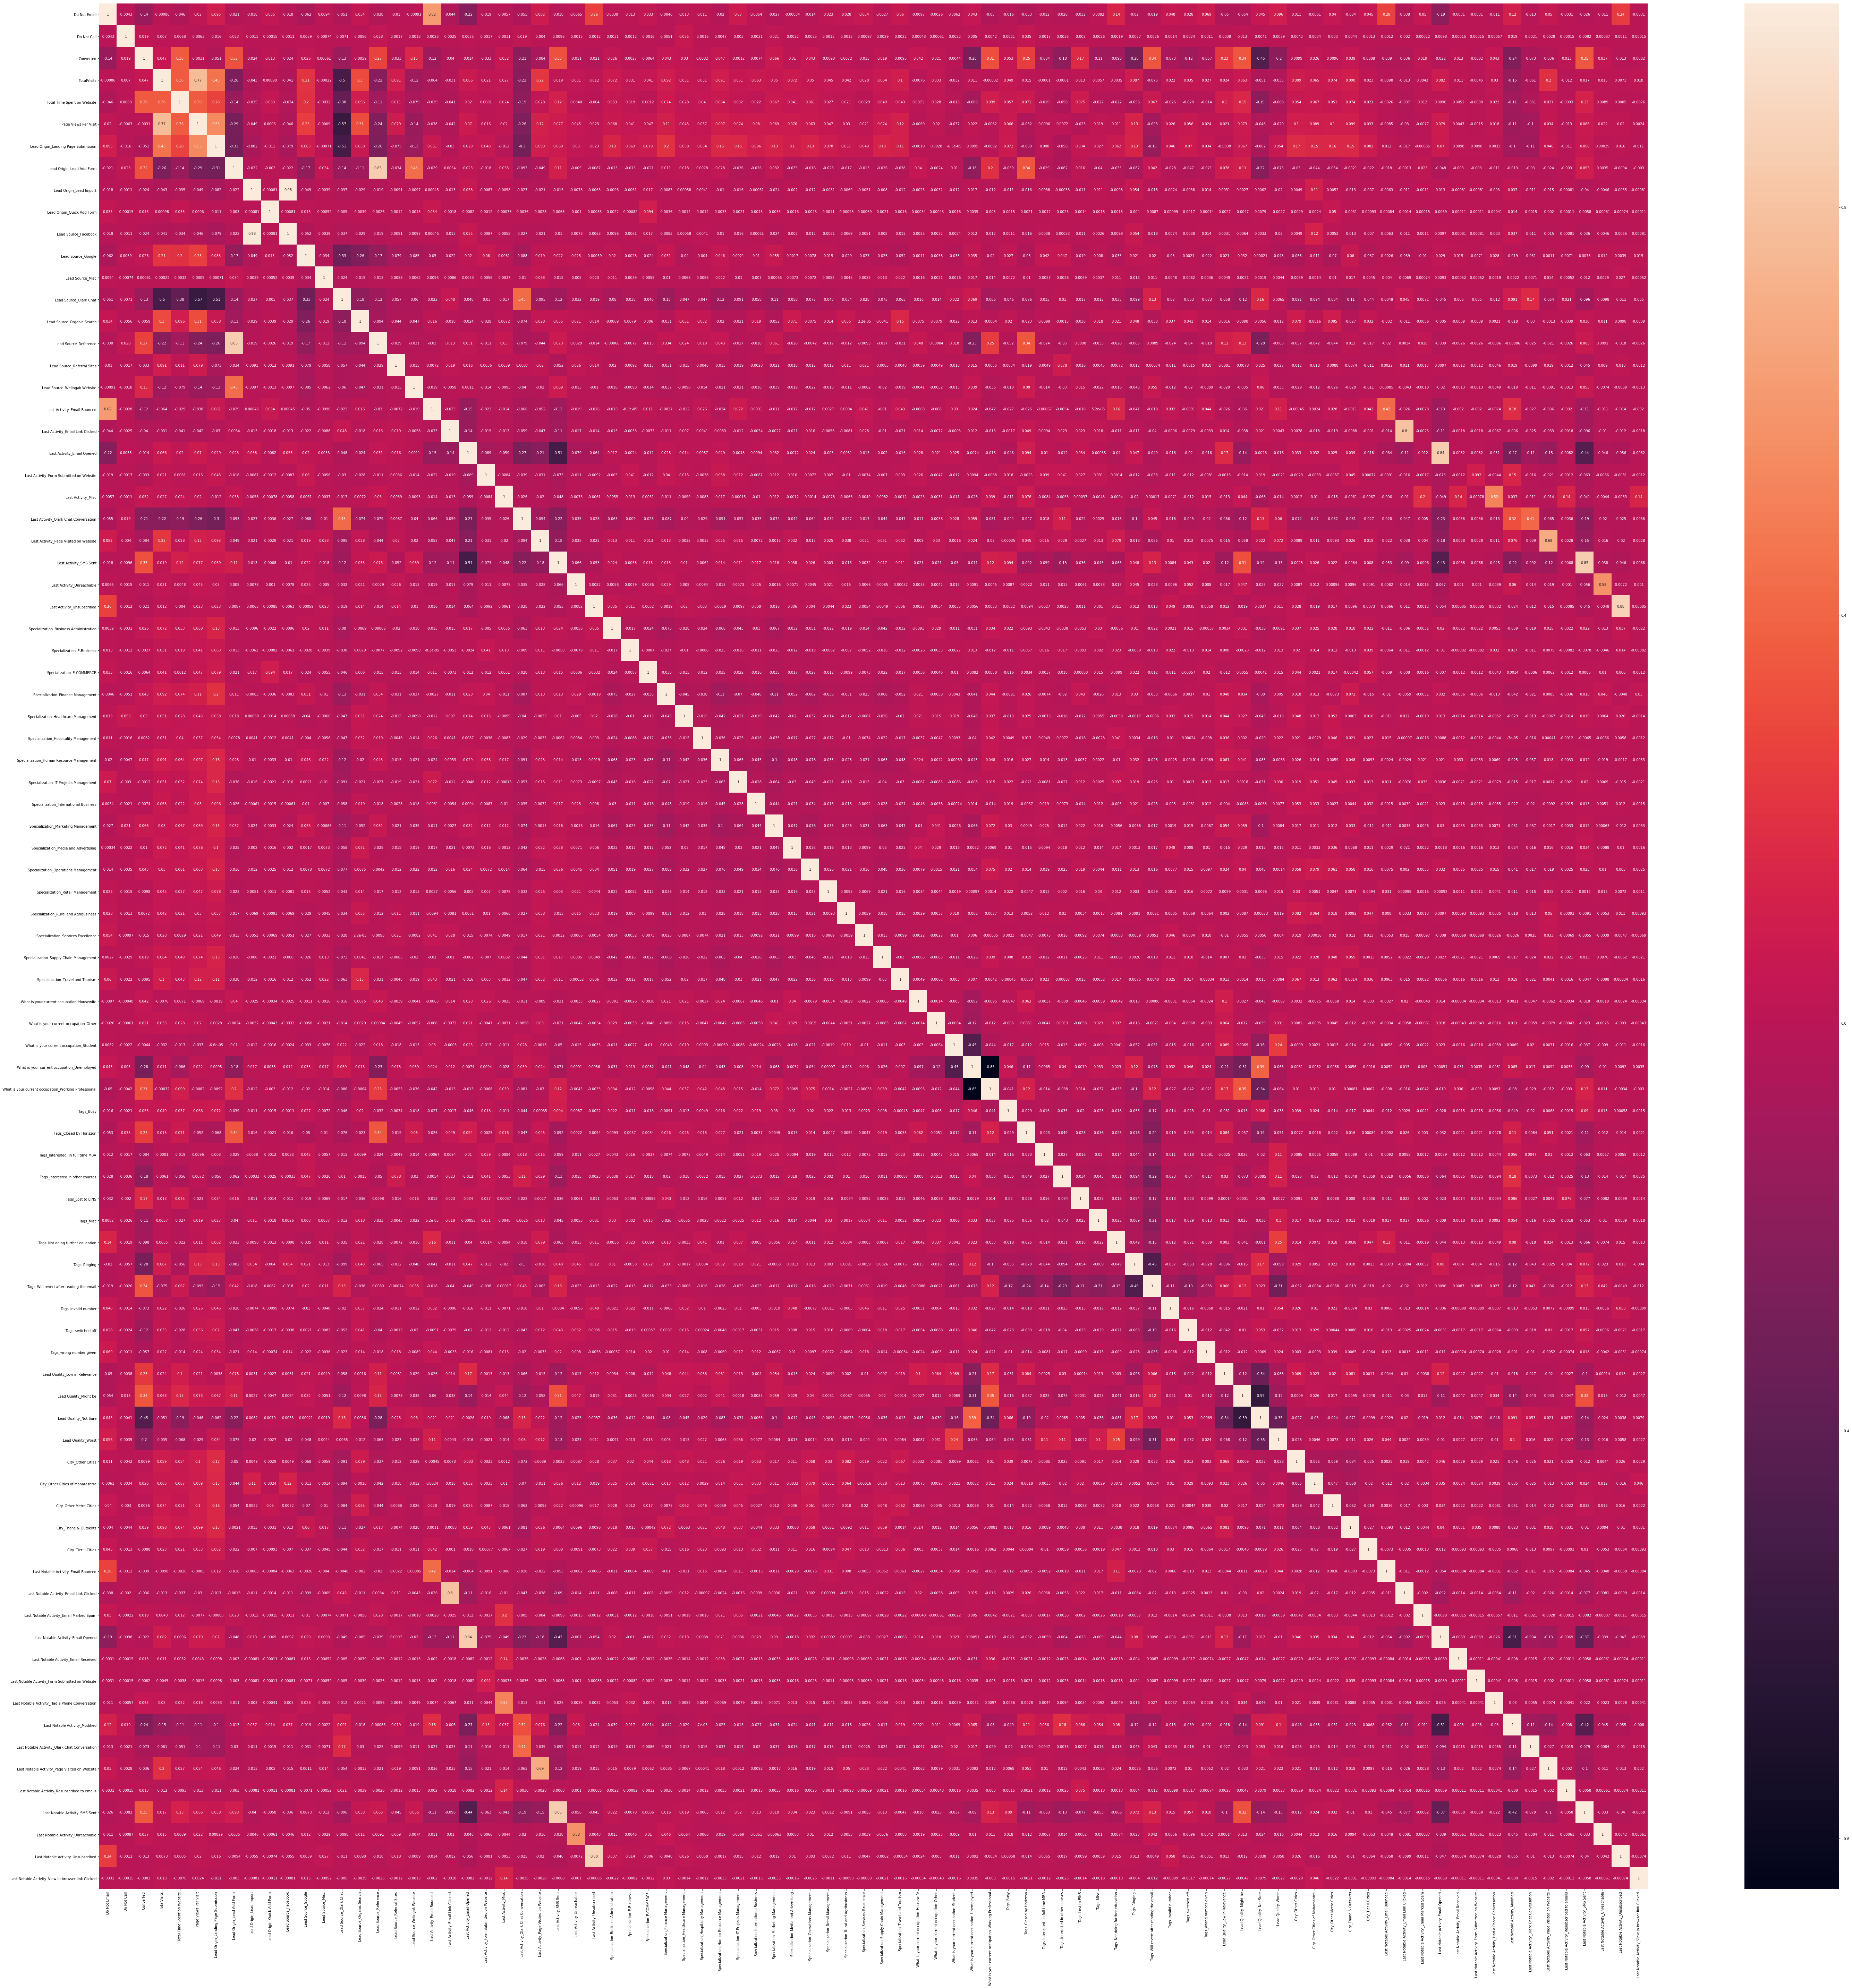

In [139]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,100))        # Size of the figure
sns.heatmap(ls.corr(),annot = True)
plt.show()

# Model Building

Running first Training Model

In [140]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6384
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        08:31:39   Pearson chi2:                 3.27e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.901e+14   2.84e+07   1.02e+07      0.000     2.9e+14     2.9e+14
Do Not Email                                         -2.541e+14   4.41e+06  -5.77e+07      0.000   -2.54e+14   -2.54e+14
Do Not Call                                           9.307e+15   4.78e+07   1.95e+08      0.000    9.31e+15    9.31e+15
TotalVisits                                           4.271e+13   1.41e+06   3.02e+07      0.000    4.27e+13    4.27e+13
Total Time Spent on Website                           1.662e+14   9.92e+05   1.68e+08      0.000    1.66e+14    1.66e+14
Page Views Per Visit                                 -6.768e+13   1.52e+06  -4.44e+07      0.000   -6.77e+13   -6.77e+13
Lead Origin_Landing Page Submission                  -1.451e+14   3.15e+06   -4.6e+07      0.000   -1.45e+14   -1.45e+14
Lead Origin_Lead Add Form                             9.371e+13   1.23e+07   7.64e+06      0.000    9.37e+13    9.37e+13
Lead Origin_Lead Import                               2.003e+15   4.82e+07   4.16e+07      0.000       2e+15       2e+15
Lead Origin_Quick Add Form                            4.223e+15    6.8e+07   6.21e+07      0.000    4.22e+15    4.22e+15
Lead Source_Facebook                                 -2.419e+15   4.82e+07  -5.02e+07      0.000   -2.42e+15   -2.42e+15
Lead Source_Google                                    4.606e+13   2.45e+06   1.88e+07      0.000    4.61e+13    4.61e+13
Lead Source_Misc                                      3.133e+14   1.63e+07   1.92e+07      0.000    3.13e+14    3.13e+14
Lead Source_Olark Chat                               -3.682e+14   3.84e+06  -9.59e+07      0.000   -3.68e+14   -3.68e+14
Lead Source_Organic Search                            -1.08e+12   3.24e+06  -3.34e+05      0.000   -1.08e+12   -1.08e+12
Lead Source_Reference                                 3.132e+12   1.28e+07   2.45e+05      0.000    3.13e+12    3.13e+12
Lead Source_Referral Sites                           -1.183e+14   7.54e+06  -1.57e+07      0.000   -1.18e+14   -1.18e+14
Lead Source_Welingak Website                          9.262e+14   1.42e+07   6.54e+07      0.000    9.26e+14    9.26e+14
Last Activity_Email Bounced                           1.017e+14    7.5e+06   1.36e+07      0.000    1.02e+14    1.02e+14
Last Activity_Email Link Clicked                       4.58e+14   9.36e+06   4.89e+07      0.000    4.58e+14    4.58e+14
Last Activity_Email Opened                            1.594e+14   5.23e+06   3.05e+07      0.000    1.59e+14    1.59e+14
Last Activity_Form Submitted on Website               3.789e+13   8.59e+06   4.41e+06      0.000    3.79e+13    3.79e+13
Last Activity_Misc                                   -1.426e+14   1.45e+07  -9.84e+06      0.000   -1.43e+14   -1.43e+14
Last Activity_Ol

# Feature Selection Using RFE

In [141]:
logreg = LogisticRegression()

In [142]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [143]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False])

In [144]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('Do Not Call', False, 24),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 32),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 53),
 ('Lead Source_Misc', False, 52),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 43),
 ('Last Activity_Email Opened', False, 45),
 ('Last Activity_Form Submitted on Website', False, 46),
 ('Last Activity_Misc', False, 27),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Page Visited on Website', Fals

In [145]:
col = X_train.columns[rfe.support_]

In [146]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Misc', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Misc',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Manage

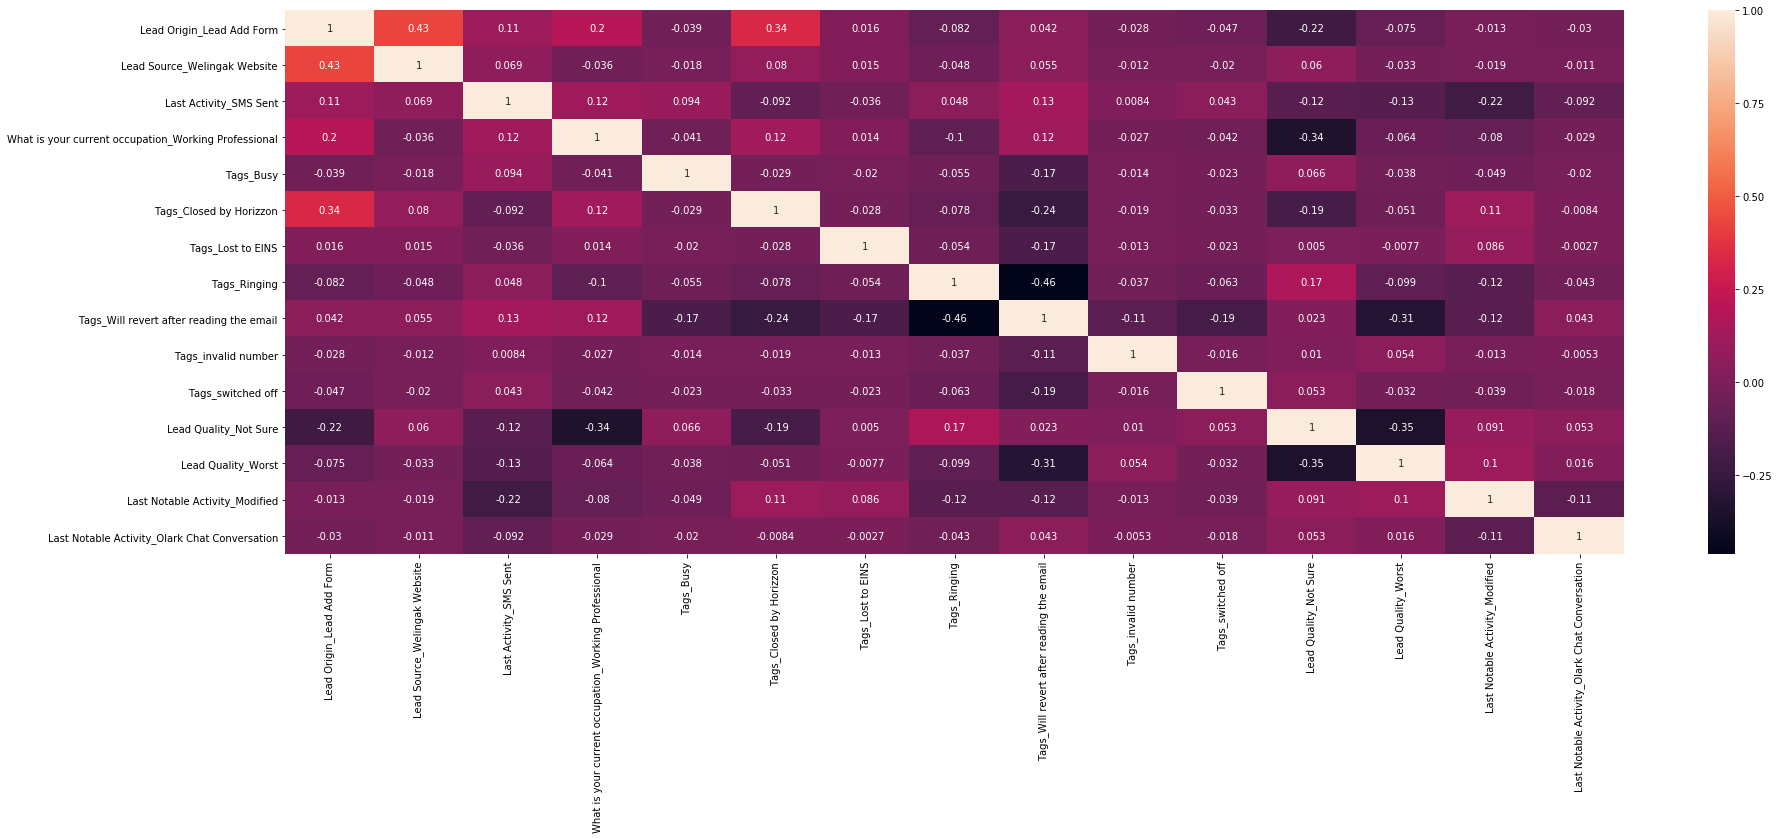

In [147]:
#Drawing Correlation
plt.figure(figsize = (30,10))  
sns.heatmap(ls[col].corr(), annot=True)

So we will be dropping "Tags_Will revert after reading with email" & "Lead Quality_Might be" whose correlation is around 0.5

In [148]:
X_test2 = X_test.drop(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website'],1)
X_train2 = X_train.drop(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website'],1)

In [149]:
col1 = col.delete(col.get_indexer(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website']))
col1

Index(['Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

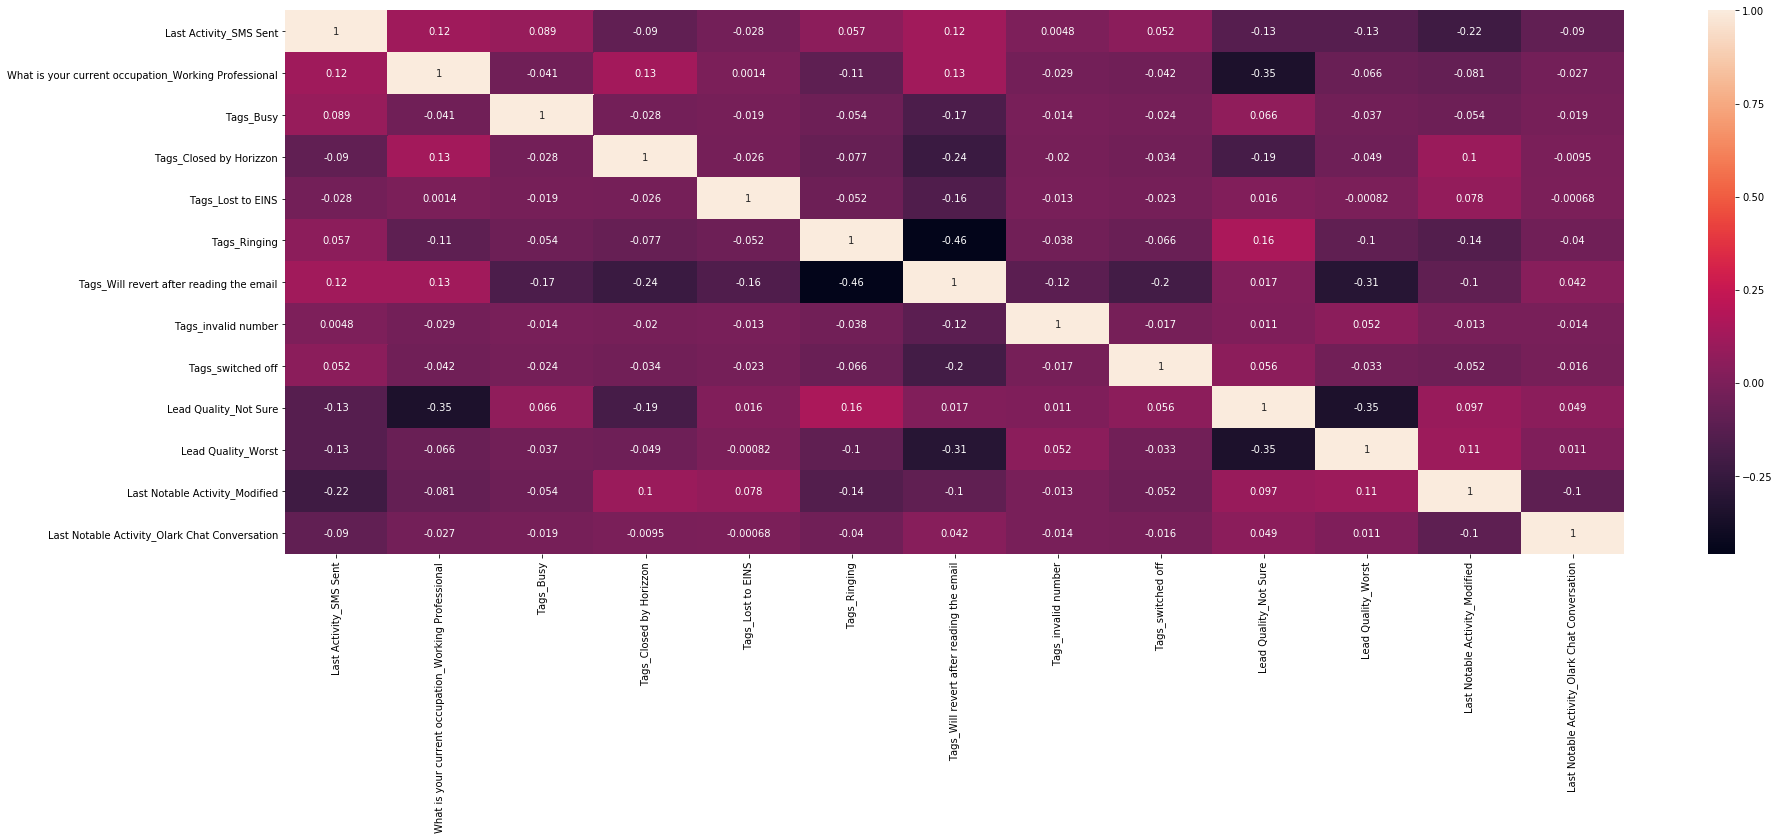

In [150]:
#Ploting the Correlation again
plt.figure(figsize = (30,10))  
sns.heatmap(X_train2[col1].corr(), annot=True)

As per the above heatmap, we can conclude there are no any variables to dropped with correlation around 0.5

In [151]:
X_train2 = X_train2[col1]
X_test2 = X_test2[col1]

#Assessing the model with StatsModels

In [152]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1649.0
Date:                Mon, 26 Aug 2019   Deviance:                       3297.9
Time:                        08:31:48   Pearson chi2:                 3.40e+04
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2384      0.210     -5.883      0.000      -1.651      -0.826
Last Activity_SMS Sent                                   1.9863      0.099     20.139      0.000       1.793       2.180
What is your current occupation_Working Professional     1.3607      0.281      4.838      0.000       0.809       1.912
Tags_Busy                                                3.5018      0.311     11.257      0.000       2.892       4.111
Tags_Closed by Horizzon                                  9.7659      1.040      9.394      0.000       7.728      11.804
Tags_Lost to EINS                                        9.4248      0.756     12.471      0.000       7.944      10.906
Tags_Ringing                                            -1.7685      0.310     -5.709      0.000      -2.376      -1.161
Tags_Will revert after reading the email                 3.7074      0.224     16.559      0.000       3.269       4.146
Tags_invalid number                                     -2.1742      1.107     -1.964      0.050      -4.344      -0.005
Tags_switched off                                       -2.5196      0.576     -4.376      0.000      -3.648      -1.391
Lead Quality_Not Sure                                   -3.4088      0.131    -26.008      0.000      -3.666      -3.152
Lead Quality_Worst                                      -3.5097      0.684     -5.132      0.000      -4.850      -2.169
Last Notable Activity_Modified                          -1.6407      0.101    -16.175      0.000      -1.839      -1.442
Last Notable Activity_Olark Chat Conversation           -1.4004      0.363     -3.855      0.000      -2.112      -0.688
========================================================================================================================
"""

In [153]:
#Removing Tags_Busy which is having 0.413 p value
col2 = col1.drop('Tags_Busy',1)

In [154]:
X_train3 = X_train2[col2]
X_test3 = X_test2[col2]

Reexecuting the model again

In [155]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train3)), family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1717.3
Date:                Mon, 26 Aug 2019   Deviance:                       3434.7
Time:                        08:31:48   Pearson chi2:                 3.11e+04
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1436      0.152     -0.945      0.345      -0.442       0.154
Last Activity_SMS Sent                                   2.1112      0.099     21.420      0.000       1.918       2.304
What is your current occupation_Working Professional     1.3214      0.255      5.178      0.000       0.821       1.822
Tags_Closed by Horizzon                                  8.4883      1.025      8.284      0.000       6.480      10.497
Tags_Lost to EINS                                        8.2727      0.749     11.046      0.000       6.805       9.741
Tags_Ringing                                            -3.0212      0.271    -11.157      0.000      -3.552      -2.490
Tags_Will revert after reading the email                 2.3469      0.147     15.933      0.000       2.058       2.636
Tags_invalid number                                     -3.3924      1.098     -3.090      0.002      -5.544      -1.240
Tags_switched off                                       -3.7562      0.556     -6.759      0.000      -4.845      -2.667
Lead Quality_Not Sure                                   -3.1040      0.116    -26.649      0.000      -3.332      -2.876
Lead Quality_Worst                                      -4.4314      0.615     -7.204      0.000      -5.637      -3.226
Last Notable Activity_Modified                          -1.7269      0.099    -17.431      0.000      -1.921      -1.533
Last Notable Activity_Olark Chat Conversation           -1.4324      0.354     -4.047      0.000      -2.126      -0.739
========================================================================================================================
"""

#Verifying VIF

In [156]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5            Tags_Will revert after reading the email  1.28
1   What is your current occupation_Working Profes...  1.27
10                     Last Notable Activity_Modified  1.12
4                                        Tags_Ringing  1.11
6                                 Tags_invalid number  1.06
9                                  Lead Quality_Worst  1.03
3                                   Tags_Lost to EINS  0.62
8                               Lead Quality_Not Sure  0.15
7                                   Tags_switched off  0.14
2                             Tags_Closed by Horizzon  0.13
11      Last Notable Activity_Olark Chat Conversation  0.03
0                              Last Activity_SMS Sent  0.01

#As per the above values, we can observe that there are no values >= 5.

In [157]:
X_test3.shape

(2772, 12)

In [158]:
X_train3.shape

(6468, 12)

# Making Predictions

In [159]:
X_train_sm = sm.add_constant(X_train3)

In [160]:
y_train_pred = res3.predict(X_train_sm)
y_train_pred[:]

1871    0.001891
6795    0.288898
3516    0.001891
8105    0.258539
3934    0.067379
4844    0.996445
3297    0.001891
8071    0.999644
987     0.067379
7423    0.986803
1032    0.770387
6542    0.986803
4317    0.900539
6472    0.900539
712     0.000337
3960    0.288898
4654    0.288898
5902    0.067379
4691    0.288898
4341    0.900539
3677    0.288898
1050    0.900539
9115    0.986803
2878    0.999937
6167    0.770387
9031    0.971380
2175    0.288898
3147    0.986803
8886    0.930056
7944    0.015405
          ...   
2526    0.986803
4713    0.001891
889     0.971380
2       0.900539
3408    0.067379
4859    0.037413
3767    0.067379
4231    0.877354
2883    0.000162
5843    0.001985
6901    0.001829
3213    0.559883
4993    0.770387
1900    0.288898
5787    0.996445
2434    0.258539
6230    0.996445
5769    0.242988
7738    0.986803
1340    0.900539
4376    0.010201
802     0.900539
5646    0.999762
7906    0.010201
4149    0.998665
350     0.900539
79      0.857867
8039    0.2888

In [161]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:]

array([0.00189092, 0.28889777, 0.00189092, ..., 0.28889777, 0.13347734,
       0.06737903])

In [162]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.001891         1871
1          0        0.288898         6795
2          0        0.001891         3516
3          0        0.258539         8105
4          0        0.067379         3934

#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [163]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted
0          0        0.001891         1871          0
1          0        0.288898         6795          0
2          0        0.001891         3516          0
3          0        0.258539         8105          0
4          0        0.067379         3934          0

In [164]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3856  146]
 [ 420 2046]]


In [165]:
# Predicted     not_converted    converted
# Actual
# not_converted        3856           146
# converted            420            2046 

In [166]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.829683698296837

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.9635182408795602

In [169]:
# Calculate false postive rate - predicting churn when customer does not have converted
print(FP/ float(TN+FP))

0.03648175912043978


In [170]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9333941605839416


In [171]:
# Negative predictive value
print (TN / float(TN+ FN))

0.90177736202058


In [172]:
#Verifying over all accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9124922696351268


#As per the above value of accuracy is around 90%, So we can colude that its a good model

In [173]:
#Drawing roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

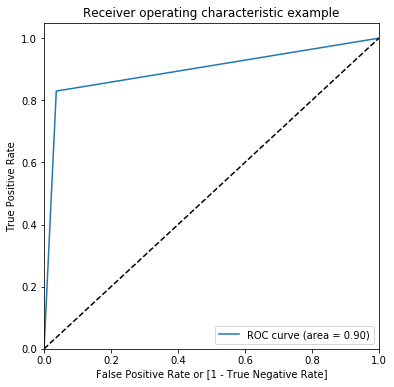

(array([0.        , 0.03648176, 1.        ]),
 array([0.       , 0.8296837, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [174]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [175]:
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

'0.95'

As per the above inference, AUC score of 0.95 looks like its a good work.
- But we did spend a lot of effort on the features and their selection.
- To reduce the effort, we can use PCA

In [176]:
# Calculating PCA 
X_train3.shape

(6468, 12)

In [177]:
pca = PCA(svd_solver='randomized', random_state=42)

#Doing the PCA on the train data
pca.fit(X_train3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

## Ploting principal components 
- Will plot original features on the first 2 principal components

In [178]:
pca.components_

array([[ 4.72713006e-01,  1.56735227e-01, -4.77881849e-02,
        -2.98614533e-02, -1.88640209e-01,  5.91032072e-01,
        -9.83134466e-03, -2.28394063e-02, -3.37563059e-01,
        -7.97405346e-02, -4.92896868e-01,  4.90287924e-03],
       [ 2.16817470e-01,  8.94793057e-02,  7.96436551e-02,
         1.38787182e-02,  2.69064197e-01, -6.53462781e-01,
         1.29685430e-02,  3.66570580e-02, -5.58230985e-01,
         1.77187592e-01, -3.07155269e-01, -1.28530800e-02],
       [-2.47780479e-01,  1.53295541e-01,  8.69462822e-02,
         7.49743321e-03, -3.65030088e-01,  1.50705245e-01,
        -4.34951325e-03, -3.67468306e-02, -6.50744985e-01,
         1.88112360e-01,  5.39513931e-01, -1.51849466e-02],
       [ 7.99392991e-01, -7.82602417e-03, -7.07737046e-03,
         1.51938358e-02,  5.90449065e-02, -8.42926045e-02,
         1.39809832e-03,  1.75010429e-02,  1.03208562e-01,
        -5.49536345e-02,  5.77083619e-01, -5.50586892e-02],
       [-1.50823392e-01,  4.18731528e-01,  9.9704430

In [179]:
colnames = list(X_train3.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2                                            Feature
0  0.472713  0.216817                             Last Activity_SMS Sent
1  0.156735  0.089479  What is your current occupation_Working Profes...
2 -0.047788  0.079644                            Tags_Closed by Horizzon
3 -0.029861  0.013879                                  Tags_Lost to EINS
4 -0.188640  0.269064                                       Tags_Ringing

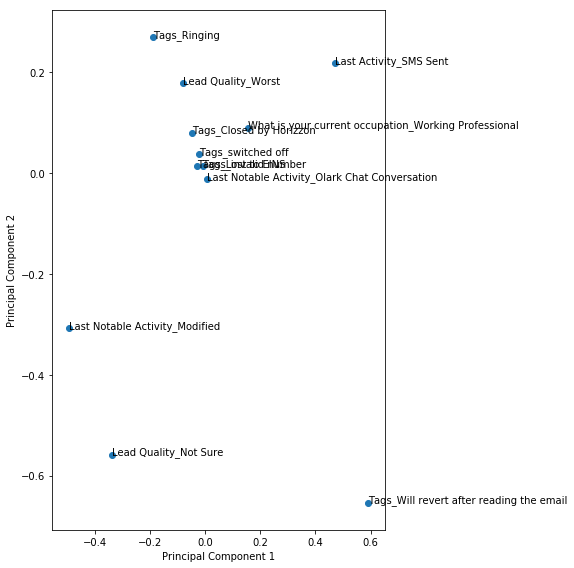

In [180]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

As per the above graph, we can observe that the fist component is in  direction where the "Last Activity_SMS sent" variables are heavy
 - These are few components also have the highest of the loadings Ex: "Lead Quality Worst", "Tags Closed by Horizon" etc...

In [181]:
pca.explained_variance_ratio_

array([0.25172936, 0.21190478, 0.18883687, 0.13477396, 0.05973975,
       0.04947405, 0.03314784, 0.02251514, 0.01647672, 0.01380009,
       0.01075034, 0.00685109])

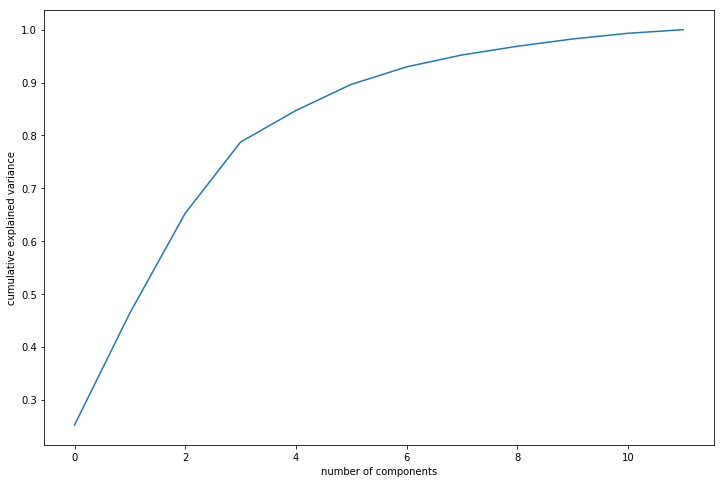

In [182]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Seems to be 16 components are enough to describe 95% of the variance
- Lets choose 9 components for our modeling

In [183]:
# Basis transformation - getting the data onto our PCs
pca_final = IncrementalPCA(n_components=9)
df_train_pca = pca_final.fit_transform(X_train3)
df_train_pca.shape

(6468, 9)

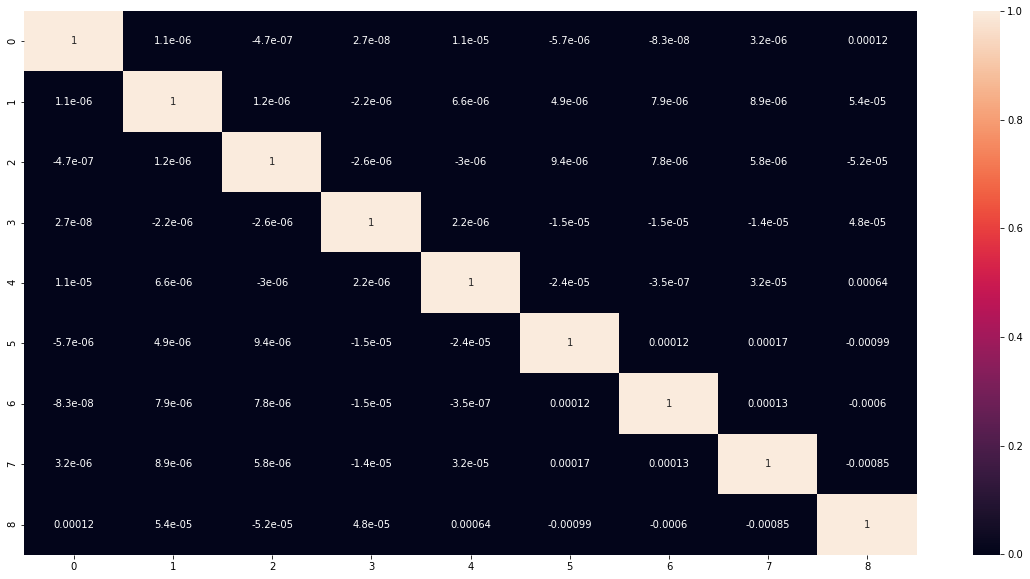

In [184]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [185]:
 # 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0006365639551354067 , min corr:  -0.0009860268885536862


In [186]:
#Applying selected components to the test data - 9 components
df_test_pca = pca_final.transform(X_test3)
df_test_pca.shape

(2772, 9)

#### Applying a logistic regression on our Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any important information

In [187]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

* Note:- We are fitting the original variable y with the transformed variables (principal components). This is not a issue becuase the transformation is done on PCA is "linear", which implies that we only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear.

In [188]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.93'

roc_auc_score with out PCA was 0.95 where as with PCA it's 0.93 which is close. Hence we can also conclude that PCA with 9 components also has good coverage.

# Assigning Lead Score

In [189]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  Lead_Score
0          0        0.001891         1871          0           0
1          0        0.288898         6795          0          29
2          0        0.001891         3516          0           0
3          0        0.258539         8105          0          26
4          0        0.067379         3934          0           7

In [190]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [191]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.829683698296837

In [192]:
# Let us calculate specificity
TN / float(TN+FP)

0.9635182408795602

In [193]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03648175912043978


In [194]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9333941605839416


In [195]:
# Negative predictive value
print (TN / float(TN+ FN))

0.90177736202058


In [196]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3856,  146],
       [ 420, 2046]], dtype=int64)

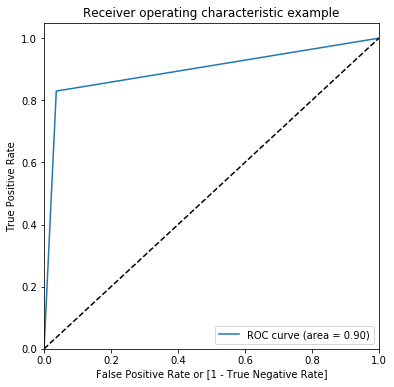

(array([0.        , 0.03648176, 1.        ]),
 array([0.       , 0.8296837, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [197]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

We see an overall AUC score of 0.95 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- We can use PCA to reduce the effort

In [198]:
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

'0.95'

The over all accuracy is 95% 

In [199]:
# Converted Vs Predicted
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      1
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      0
 21      1
 22      1
 23      1
 24      1
 25      

Final list with atleast 80% conversion rate

In [200]:
final_list_with_80_Percent_conversion_rate = y_train_pred_final[y_train_pred_final.Converted_prob>=0.8]

In [201]:
len(final_list_with_80_Percent_conversion_rate)

1624

There are around 1624 customers with atleast 80% probability of converting

In [202]:
final_list_with_80_Percent_conversion_rate.head()

Converted  Converted_prob  Prospect ID  predicted  Lead_Score
5           1        0.996445         4844          1         100
7           1        0.999644         8071          1         100
9           1        0.986803         7423          1          99
11          0        0.986803         6542          1          99
12          1        0.900539         4317          1          90

In [203]:
# sorting data frame based on high lead_scores
final_list_with_80_Percent_conversion_rate = final_list_with_80_Percent_conversion_rate.sort_values(by='Lead_Score', ascending=False)
final_list_with_80_Percent_conversion_rate.head()

Converted  Converted_prob  Prospect ID  predicted  Lead_Score
5             1        0.996445         4844          1         100
1702          1        0.996445         4543          1         100
1520          1        0.999838         3687          1         100
1517          1        0.996445         2672          1         100
5459          1        0.998665         8704          1         100